In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [2]:
df = pd.read_csv("../Data/6.K_means1_6f.csv")
df

,customer_unique_id,order_status,product_category_name_english,review_score,Recency_x,Frequency_x,Monetary,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,7,49,4.0,27.289810,2,1.303348,3
1,af07308b275d755c9edb36a90c618231,7,60,4.0,14.162002,1,1.601216,1
2,3a653a41f6f9fc3d2a113cf8398680e8,7,5,5.0,13.051752,1,1.647432,2
3,7c142cf63193a1473d2e66489a9ae977,7,61,5.0,25.737451,1,1.457031,1
4,72632f0f9dd73dfee390c9b22eb56dd6,7,67,5.0,22.505471,1,1.220373,1
...,...,...,...,...,...,...,...,...
95358,6359f309b166b0196dbf7ad2ac62bb5a,7,43,5.0,33.093157,1,1.494089,1
95359,da62f9e57a76d978d02ab5362c509660,7,6,4.0,22.786720,1,1.663569,2
95360,737520a9aad80b3fbbdad19b66b37b30,7,45,5.0,28.407875,1,1.723809,1
95361,5097a5312c8b157bb7be58ae360ef43c,7,15,2.0,23.908753,1,1.686544,0


In [3]:
df['Cluster'].unique()

array([3, 1, 2, 0, 4])

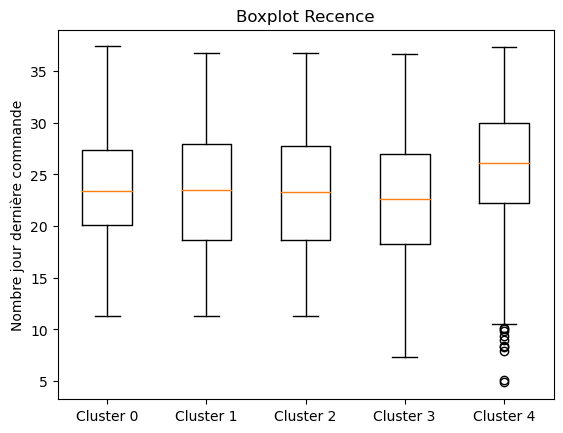

In [4]:
import matplotlib.pyplot as plt

test1 = df[df['Cluster'] == 0]
test2 = df[df['Cluster'] == 1]
test3 = df[df['Cluster'] == 2]
test4 = df[df['Cluster'] == 3]
test5 = df[df['Cluster'] == 4]
donnees = [test1['Recency_x'], test2['Recency_x'], test3['Recency_x'],test4['Recency_x'], test5['Recency_x']]

plt.boxplot(donnees)
plt.title("Boxplot Recence")
plt.ylabel("Nombre jour dernière commande")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

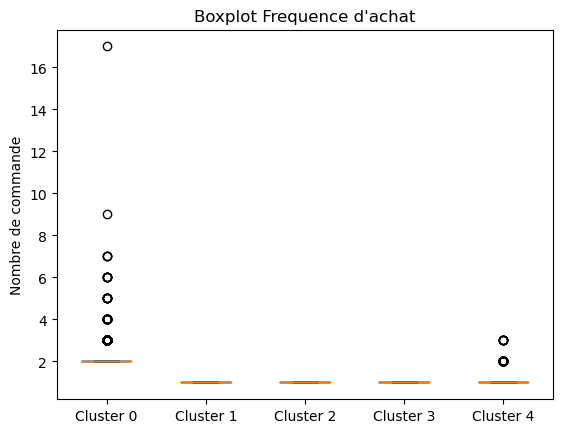

In [5]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Frequency_x'])

plt.boxplot(recency)
plt.title("Boxplot Frequence d'achat")
plt.ylabel("Nombre de commande")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

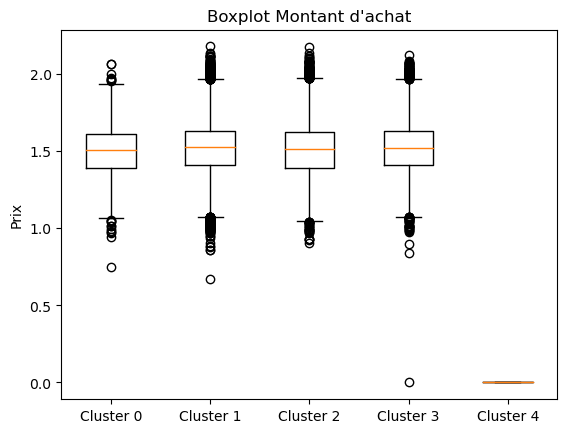

In [6]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['Monetary'])

plt.boxplot(recency)
plt.title("Boxplot Montant d'achat")
plt.ylabel("Prix")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

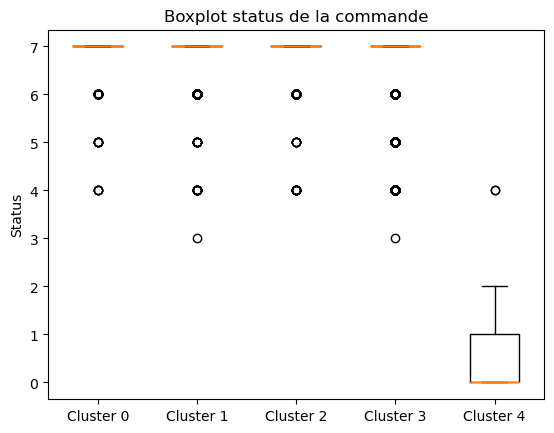

In [7]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['order_status'])

plt.boxplot(recency)
plt.title("Boxplot status de la commande")
plt.ylabel("Status")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

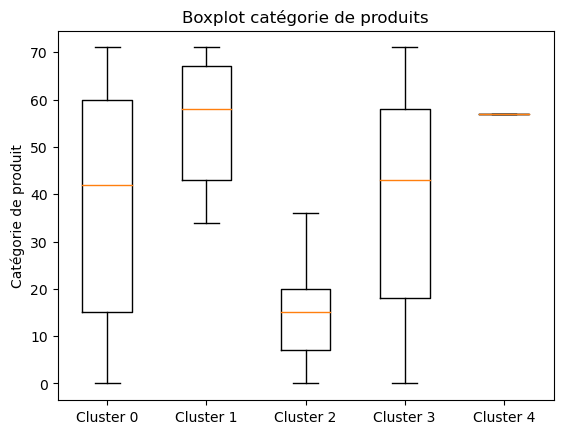

In [9]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['product_category_name_english'])

plt.boxplot(recency)
plt.title("Boxplot catégorie de produits")
plt.ylabel("Catégorie de produit")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

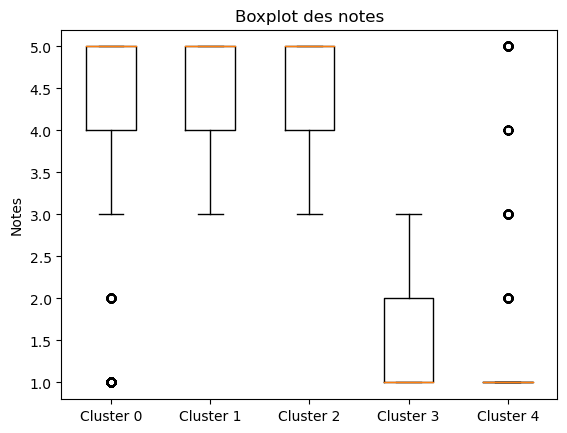

In [10]:
import matplotlib.pyplot as plt

clusters = df['Cluster'].unique()
recency = []

for cluster in clusters:
    recency.append(df[df['Cluster'] == cluster]['review_score'])

plt.boxplot(recency)
plt.title("Boxplot des notes")
plt.ylabel("Notes")

etiquettes = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(range(1, len(etiquettes) + 1), etiquettes)

plt.show()

In [11]:
df[df['Cluster'] == 4]

,customer_unique_id,order_status,product_category_name_english,review_score,Recency_x,Frequency_x,Monetary,Cluster
264,41fc647b8c6bd979b1b6364b60471b50,0,57,1.0,25.805898,1,0.0,4
392,8ea097b1824dbd4d17af71b0afe04301,1,57,1.0,13.358307,1,0.0,4
579,0e634b16e4c585acbd7b2e8276ce6677,0,57,3.0,23.024426,1,0.0,4
606,c4ebedb09beb89cc0314c5c0c33f8053,1,57,1.0,23.220222,2,0.0,4
680,596ed6d7a35890b3fbac54ec01f69685,0,57,1.0,28.798293,1,0.0,4
...,...,...,...,...,...,...,...,...
95162,0aa3b096dc796c251f9b36a822051ed6,0,57,1.0,24.500778,1,0.0,4
95180,a33e0969408919ba06779f497ead93ec,0,57,1.0,23.605809,1,0.0,4
95211,e90598185d2427a35e32ef241a5c04aa,1,57,5.0,11.099308,1,0.0,4
95272,e72a90a2b29fe1a8795b284aaaa3246f,0,57,1.0,28.528720,1,0.0,4


In [12]:
df_test = pd.read_csv('../Data/1.olist_dataset.csv')
df_test[df_test['customer_unique_id'] == '596ed6d7a35890b3fbac54ec01f69685']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english
828,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,1900-01-01 00:00:00,1900-02-01 00:00:00,2017-09-05 00:00:00,1.0,boleto,1.0,132.46,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,no title,Até hoje não recebi meu produto e nem uma resp...,2017-09-10 00:00:00,2017-09-12 17:00:15,0.0,0,0,1900-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no city,no state,0.0,0.0,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,-23.454905,-46.592706,no product
